# Module 3.1: Loading data

### Fabric Prerequistis

You need to have Lakehouse enabled and connected. 

Link to Lakehouse (replace these strings)
- Tables: `abfss://Fabric_2024@onelake.dfs.fabric.microsoft.com/LK_flights.Lakehouse/Tables`
- Files: `abfss://Fabric_2024@onelake.dfs.fabric.microsoft.com/LK_flights.Lakehouse/Files`

You will also need:
- PySpark notebook and connect it to the Fabric standard session

## Loading from CSV files

Example on Loading data from CSV file available in Lakehouse.

!Important: before starting, make sure to connect to standard session cluster

In [17]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import seaborn as sb
%matplotlib inline

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 19, Finished, Available, Finished)

In [3]:
path = "/lakehouse/default/" + "Files/airlines.csv"

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 5, Finished, Available, Finished)

In [4]:
df_airlines = pd.read_csv(path)
display(df_airlines)


StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 6, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 5fb73a2d-3982-46ad-b154-00d3e4223bec)

In [5]:
df_airports = pd.read_csv("/lakehouse/default/" + "Files/airports.csv")
display(df_airports)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 7, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 7f7bcad3-2f64-494d-bb5d-73df261dd30d)

In [6]:
df_flights = pd.read_csv("/lakehouse/default/" + "Files/flights.csv")
display(df_flights)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 8, Finished, Available, Finished)

/tmp/ipykernel_9555/3305833390.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv("/lakehouse/default/" + "Files/flights.csv")


SynapseWidget(Synapse.DataFrame, 71ca32ed-ad20-4c68-84ba-c11a916c5fd7)

In [8]:
df_flights.shape

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 10, Finished, Available, Finished)

(5819079, 31)

## Merging CSV and making one dataframe

In [ ]:
df_flights
df_airports
df_airlines


## Checking missing values


In [28]:

missing_data = df_flights.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(df_flights.shape[0]-missing_data['missing values'])/df_flights.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)
missing_data

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 30, Finished, Available, Finished)

,variable,missing values,filling factor (%)
0,YEAR,0,100.000000
1,MONTH,0,100.000000
2,DAY,0,100.000000
3,DAY_OF_WEEK,0,100.000000
4,AIRLINE,0,100.000000
5,FLIGHT_NUMBER,0,100.000000
6,TAIL_NUMBER,14721,99.747022
7,ORIGIN_AIRPORT,0,100.000000
8,DESTINATION_AIRPORT,0,100.000000
9,SCHEDULED_DEPARTURE,0,100.000000


## Data Quantliy and tidiness assessment

In [21]:
# df_flights['Date'] = pd.to_datetime(df_flights.YEAR.map(str)+'-'+df_flights.MONTH.map(str)+'-'+df_flights.DAY.map(str))

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 23, Finished, Available, Finished)

In [12]:
df_flights[df_flights['CANCELLED']==1].shape[0]

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 14, Finished, Available, Finished)

89884

We have a total of 89884 cancelled flights.



In [30]:
df_flights[df_flights['DIVERTED']==1].shape[0]

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 32, Finished, Available, Finished)

15187

We have a total of 15187 diverted flight.



In [13]:
df_flights[df_flights['DIVERTED']==1].isnull().sum()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 15, Finished, Available, Finished)

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER                0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             1
ELAPSED_TIME           15187
AIR_TIME               15187
DISTANCE                   0
WHEELS_ON               2629
TAXI_IN                 2629
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2629
ARRIVAL_DELAY          15187
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    15187
AIR_SYSTEM_DELAY       15187
SECURITY_DELAY         15187
AIRLINE_DELAY          15187
LATE_AIRCRAFT_DELAY    15187
WEATHER_DELAY          15187
dtype: int64

We can see that:

- for some features all the missing data are caused by the cancellation of the flight. These features are: 'TAIL_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF'.
- for some features a great part of missing data is caused by the cancellation of the flight like: 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'.
- for some features the missing values caused by the cancellation of the flight counts for a little % of the total missing values. These features are: 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', and 'WEATHER_DELAY'.
- All the records of the cancelled flights have cancellation_reason

Lets see the flights that have a positive delay.

In [31]:
df_flights[df_flights['DEPARTURE_DELAY']>0].shape[0]

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 33, Finished, Available, Finished)

2125618

In [32]:
df_flights[df_flights['ARRIVAL_DELAY']>0].shape[0]

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 34, Finished, Available, Finished)

2086896

In [33]:
df_flights[df_flights['DEPARTURE_DELAY']>0].isnull().sum()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 35, Finished, Available, Finished)

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                  2062
WHEELS_OFF                2062
SCHEDULED_TIME               3
ELAPSED_TIME             10569
AIR_TIME                 10569
DISTANCE                     0
WHEELS_ON                 4285
TAXI_IN                   4285
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME              4285
ARRIVAL_DELAY            10569
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    2123078
AIR_SYSTEM_DELAY       1174745
SECURITY_DELAY         1174745
AIRLINE_DELAY          1174745
LATE_AIRCRAFT_DELAY    1174745
WEATHER_DELAY          1174745
Date                         0
dtype: i

In [34]:
df_flights[df_flights['ARRIVAL_DELAY']>0].isnull().sum()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 36, Finished, Available, Finished)

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    2086896
AIR_SYSTEM_DELAY       1023457
SECURITY_DELAY         1023457
AIRLINE_DELAY          1023457
LATE_AIRCRAFT_DELAY    1023457
WEATHER_DELAY          1023457
Date                         0
dtype: i

Based on these two tables, we have delayed flights either in take-off or in arrival that present several missing values. However, let's see an example before taking the decision.

In [36]:
df_flights[df_flights['ARRIVAL_DELAY']>0].head(2)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 38, Finished, Available, Finished)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Date
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


As given in the example, we still have a big part of missing values in the features: 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', and 'WEATHER_DELAY'. Therefore, I propose to drop these features. As for others, I think we should devide the data set into 3 parts: normal flights, cancelled flights, and diverted flights. Because each category has its features.

## some helper functions

In [22]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure

# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(data, col):    
    liste = []
    for index, cols in data[['Date', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 24, Finished, Available, Finished)

In [38]:
#df_flights['CRSDepTime'] = create_flight_time(df_flights, 'CRSDepTime')
#df_flights['DepTime'] = df_flights['DepTime'].apply(format_heure)
#df_flights['CRSArrTime'] = df_flights['CRSArrTime'].apply(format_heure)
#df_flights['ArrTime'] = df_flights['ArrTime'].apply(format_heure)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 40, Finished, Available, Finished)

### Data restructuring

In [39]:
canceled_flights = df_flights[df_flights['CANCELLED']==1]
diverted_flights = df_flights[df_flights['DIVERTED']==1]
canceled_flights.shape[0], diverted_flights.shape[0], df_flights.shape[0]

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 41, Finished, Available, Finished)

(89884, 15187, 5819079)

In [41]:
cleaned_flights = df_flights.drop(canceled_flights.index)
cleaned_flights = cleaned_flights.drop(diverted_flights.index)


StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 43, Finished, Available, Finished)

In [42]:
canceled_flights.reset_index(drop=True, inplace=True)
diverted_flights.reset_index(drop=True, inplace=True)
cleaned_flights.reset_index(drop=True, inplace=True)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 44, Finished, Available, Finished)

Sanity check of data dimensionality

In [44]:
canceled_flights.shape[0] + diverted_flights.shape[0]+ cleaned_flights.shape[0] == df_flights.shape[0]

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 46, Finished, Available, Finished)

True

In [45]:
cols = canceled_flights.isnull().sum()[canceled_flights.isnull().sum()>0].index.tolist()
cols.remove('SCHEDULED_TIME')

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 47, Finished, Available, Finished)

In [46]:
canceled_flights.drop(cols, axis=1,inplace=True)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 48, Finished, Available, Finished)

/tmp/ipykernel_9555/1413954667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_flights.drop(cols, axis=1,inplace=True)


In [47]:
canceled_flights['SCHEDULED_TIME'].mode()[0]
canceled_flights['SCHEDULED_TIME'] = canceled_flights['SCHEDULED_TIME'].fillna(85)

#check
canceled_flights.isnull().sum()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 49, Finished, Available, Finished)

/tmp/ipykernel_9555/3986353439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_flights['SCHEDULED_TIME'] = canceled_flights['SCHEDULED_TIME'].fillna(85)


YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
Date                   0
dtype: int64

Now, we have fixed the canceled flights table. Lets move to the diverted flights table.

In [48]:
diverted_flights.isnull().sum()*100/diverted_flights.shape[0]

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 50, Finished, Available, Finished)

YEAR                     0.000000
MONTH                    0.000000
DAY                      0.000000
DAY_OF_WEEK              0.000000
AIRLINE                  0.000000
FLIGHT_NUMBER            0.000000
TAIL_NUMBER              0.000000
ORIGIN_AIRPORT           0.000000
DESTINATION_AIRPORT      0.000000
SCHEDULED_DEPARTURE      0.000000
DEPARTURE_TIME           0.000000
DEPARTURE_DELAY          0.000000
TAXI_OUT                 0.000000
WHEELS_OFF               0.000000
SCHEDULED_TIME           0.006585
ELAPSED_TIME           100.000000
AIR_TIME               100.000000
DISTANCE                 0.000000
WHEELS_ON               17.310858
TAXI_IN                 17.310858
SCHEDULED_ARRIVAL        0.000000
ARRIVAL_TIME            17.310858
ARRIVAL_DELAY          100.000000
DIVERTED                 0.000000
CANCELLED                0.000000
CANCELLATION_REASON    100.000000
AIR_SYSTEM_DELAY       100.000000
SECURITY_DELAY         100.000000
AIRLINE_DELAY          100.000000
LATE_AIRCRAFT_

In [49]:
cols=['ELAPSED_TIME', 'AIR_TIME', 'ARRIVAL_DELAY', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 
      'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 51, Finished, Available, Finished)

In [50]:
diverted_flights.drop(cols, axis=1, inplace=True)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 52, Finished, Available, Finished)

/tmp/ipykernel_9555/1670510325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted_flights.drop(cols, axis=1, inplace=True)


In [51]:
diverted_flights.shape

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 53, Finished, Available, Finished)

(15187, 23)

In [52]:
diverted_flights[['SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'WHEELS_ON', 'TAXI_IN']]

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 54, Finished, Available, Finished)

,SCHEDULED_ARRIVAL,ARRIVAL_TIME,WHEELS_ON,TAXI_IN
0,1009,1451.0,1447.0,4.0
1,1041,1505.0,1456.0,9.0
2,1000,1219.0,1214.0,5.0
3,1017,1319.0,1314.0,5.0
4,1135,1343.0,1340.0,3.0
...,...,...,...,...
15182,2141,NaN,NaN,NaN
15183,1720,NaN,NaN,NaN
15184,2026,2216.0,2212.0,4.0
15185,2113,2250.0,2247.0,3.0


- As we can see the Taxi in means the duration of time between the arrival and the wheels on instant. This feature could be imputed using the mode value we can even fine tune this imputation by computing the mean value by arrival aeroport, since this time is basically a caracteristic of the aeroport mixed with some weather.
- for the arrival time, the imputation is quite tricky. I propose to compute the difference in duration between the scheduled arrival and the arrival time. Then, use the median value and add it to the schedule time to imputate the arrival time.
- As for the wheels on it is simply the arrival time minus the taxi in.

Define:¶
- impute the taxi in with the mode of all arrival aeroport.
- compute the median difference between the scheduled arrival and the arrival time
- impute the arrival time = median difference + scheduled arrival
- impute wheels on = arrival time - taxi in.

In [53]:
diverted_flights['TAXI_IN'] = diverted_flights['TAXI_IN'].fillna(diverted_flights['TAXI_IN'].mode()[0])
diverted_flights['TAXI_IN'].isnull().sum()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 55, Finished, Available, Finished)

/tmp/ipykernel_9555/2370094041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted_flights['TAXI_IN'] = diverted_flights['TAXI_IN'].fillna(diverted_flights['TAXI_IN'].mode()[0])


0

In [54]:
arrival_delay = diverted_flights['ARRIVAL_TIME'] - diverted_flights['SCHEDULED_ARRIVAL']
arrival_delay.median()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 56, Finished, Available, Finished)

237.0

In [55]:
diverted_flights['ARRIVAL_TIME']=diverted_flights.apply(lambda x: x['SCHEDULED_ARRIVAL']+237 if np.isnan(x['ARRIVAL_TIME']) else x['ARRIVAL_TIME'], axis=1)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 57, Finished, Available, Finished)

/tmp/ipykernel_9555/186554692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted_flights['ARRIVAL_TIME']=diverted_flights.apply(lambda x: x['SCHEDULED_ARRIVAL']+237 if np.isnan(x['ARRIVAL_TIME']) else x['ARRIVAL_TIME'], axis=1)


In [56]:
diverted_flights['WHEELS_ON']=diverted_flights.apply(lambda x: x['ARRIVAL_TIME']-x['TAXI_IN'] if np.isnan(x['WHEELS_ON']) else x['WHEELS_ON'], axis=1)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 58, Finished, Available, Finished)

/tmp/ipykernel_9555/884776152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted_flights['WHEELS_ON']=diverted_flights.apply(lambda x: x['ARRIVAL_TIME']-x['TAXI_IN'] if np.isnan(x['WHEELS_ON']) else x['WHEELS_ON'], axis=1)


TEsting all the data

In [57]:
diverted_flights.isnull().sum()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 59, Finished, Available, Finished)

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         1
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
DIVERTED               0
CANCELLED              0
Date                   0
dtype: int64

In [58]:
diverted_flights['SCHEDULED_TIME'].mode()[0]

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 60, Finished, Available, Finished)

140.0

In [59]:
diverted_flights['SCHEDULED_TIME'] = diverted_flights['SCHEDULED_TIME'].fillna(140)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 61, Finished, Available, Finished)

/tmp/ipykernel_9555/971632391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted_flights['SCHEDULED_TIME'] = diverted_flights['SCHEDULED_TIME'].fillna(140)


test it! :)

In [60]:
diverted_flights.isnull().sum()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 62, Finished, Available, Finished)

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
DIVERTED               0
CANCELLED              0
Date                   0
dtype: int64

Now, we have to fix the arrival time and the wheels on time. These features are numerical and represent the time in a hhmm format.

Define:
fix the arrival time and the wheels on

In [61]:
def fix_time(x): 
    if x%100>=60: 
        x=x+40
    if x//100>=24:
        x=x-2400
    return x

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 63, Finished, Available, Finished)

In [62]:
diverted_flights['ARRIVAL_TIME'] = diverted_flights['ARRIVAL_TIME'].apply(fix_time)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 64, Finished, Available, Finished)

/tmp/ipykernel_9555/1491536144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted_flights['ARRIVAL_TIME'] = diverted_flights['ARRIVAL_TIME'].apply(fix_time)


In [63]:
diverted_flights['WHEELS_ON'] = diverted_flights['WHEELS_ON'].apply(fix_time)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 65, Finished, Available, Finished)

/tmp/ipykernel_9555/330380864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted_flights['WHEELS_ON'] = diverted_flights['WHEELS_ON'].apply(fix_time)


Check the Wheels_on!

In [64]:
diverted_flights['WHEELS_ON'].describe()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 66, Finished, Available, Finished)

count    15187.000000
mean      1517.064331
std        669.211384
min          0.000000
25%       1155.000000
50%       1700.000000
75%       2038.000000
max       2359.000000
Name: WHEELS_ON, dtype: float64

In [65]:
cleaned_flights.isnull().sum()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 67, Finished, Available, Finished)

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
Date                         0
dtype: i

In [66]:
# drop the missing values

cols= ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']
cleaned_flights = cleaned_flights.drop(cols, axis=1)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 68, Finished, Available, Finished)

In [67]:
cleaned_flights.isnull().sum()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 69, Finished, Available, Finished)

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
Date                   0
dtype: int64


drop the 'DIVERTED' and 'CANCELLED' features from all tables.

In [ ]:
cleaned_flights = cleaned_flights.drop(['DIVERTED', 'CANCELLED'], axis=1)
diverted_flights = diverted_flights.drop(['DIVERTED', 'CANCELLED'], axis=1)
canceled_flights = canceled_flights.drop(['DIVERTED', 'CANCELLED'], axis=1)

In [ ]:
('DIVERTED' in  cleaned_flights.columns, 'CANCELLED' in cleaned_flights.columns, 
 'DIVERTED' in  diverted_flights.columns, 'CANCELLED' in diverted_flights.columns, 
 'DIVERTED' in  canceled_flights.columns, 'CANCELLED' in canceled_flights.columns)

StatementMeta(, , , Cancelled, , Cancelled)

### Understanding the data

I. Univariate data analysis

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 70, Finished, Available, Finished)

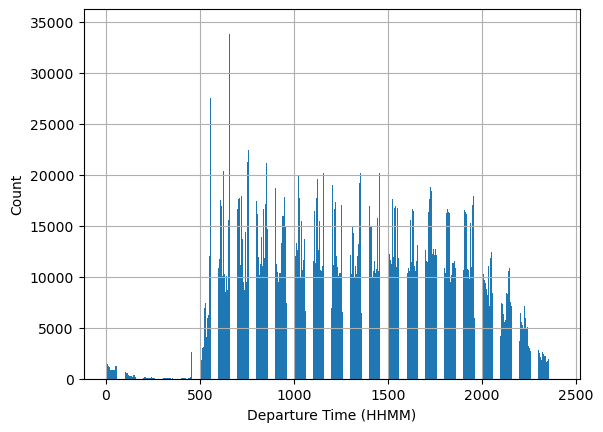

In [68]:
cleaned_flights['DEPARTURE_TIME'].hist(bins=1000)
plt.xlabel('Departure Time (HHMM)')
plt.ylabel('Count')
plt.show()

Explain: From this figure, we can observe that most flights are scheduled for departure between 5 (500) in the morning and 11 (2300) in the afternoon. We can also observe that between midnight and 5 in the morning very few flights are scheduled. One thing stands out from this graph is the gaps in the time for example between the second half of 9 in the morning (930) and the start of 10 (1000). This gap exists between each two consecutive hours. It is as if the flights are scheduled only for the first half of the hour.

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 71, Finished, Available, Finished)

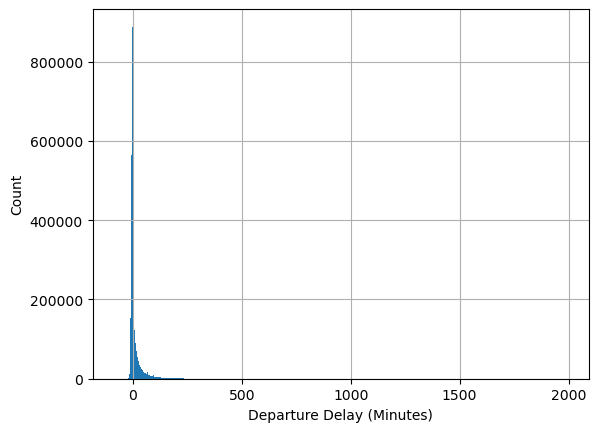

In [69]:
cleaned_flights['DEPARTURE_DELAY'].hist(bins=1000)
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Count')
plt.show()

Explain: We can see here that the departure delay has a skewed to the right distribution. From what we can see we have a very big delay values. Lets check this out.

In [70]:
cleaned_flights['DEPARTURE_DELAY'].describe()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 72, Finished, Available, Finished)

count    5.714008e+06
mean     9.294842e+00
std      3.688972e+01
min     -8.200000e+01
25%     -5.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      1.988000e+03
Name: DEPARTURE_DELAY, dtype: float64

Lets zoom in on the delays less than 240 minutes (3-hours).

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 73, Finished, Available, Finished)

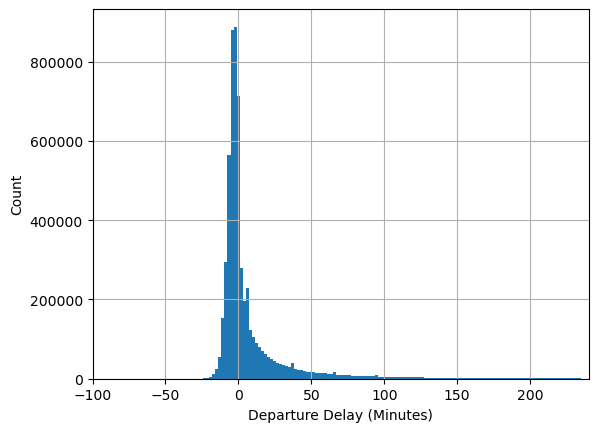

In [71]:
cleaned_flights['DEPARTURE_DELAY'].hist(bins=1000)
plt.xlabel('Departure Delay (Minutes)')
plt.xlim((-100,240))
plt.ylabel('Count')
plt.show()

We can see that most flights are actually up to 20 minutes in advance. This is quite unusual.

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 74, Finished, Available, Finished)

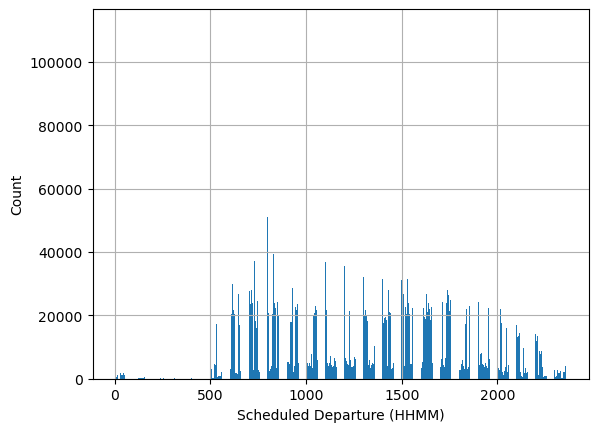

In [72]:
cleaned_flights['SCHEDULED_DEPARTURE'].hist(bins=1000)
plt.xlabel('Scheduled Departure (HHMM)')
plt.ylabel('Count')
plt.show()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 75, Finished, Available, Finished)

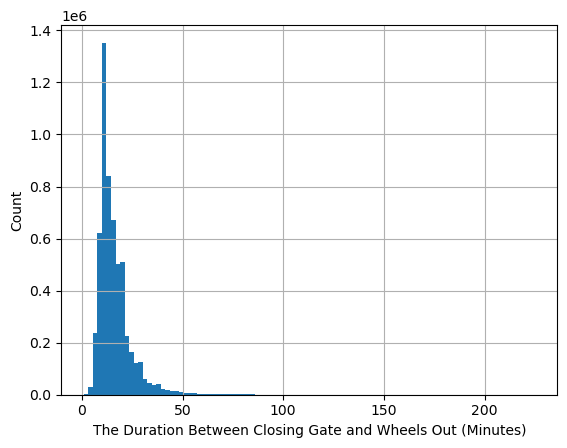

In [73]:
cleaned_flights['TAXI_OUT'].hist(bins=100)
plt.xlabel('The Duration Between Closing Gate and Wheels Out (Minutes)')
plt.ylabel('Count')
plt.show()

The distribution of the Taxi out duration is quite skewed to the right. This is quite logical.

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 76, Finished, Available, Finished)

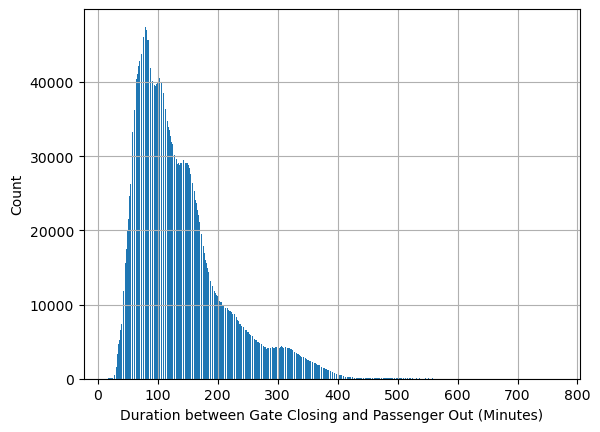

In [74]:
cleaned_flights['ELAPSED_TIME'].hist(bins=1000)
plt.xlabel('Duration between Gate Closing and Passenger Out (Minutes)')
plt.ylabel('Count')
plt.show()

Lets analyse the relative count of flights to the month and the day of the week.

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 80, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


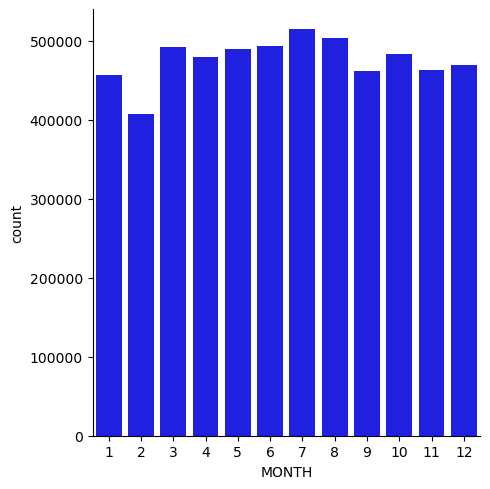

In [78]:
sns.catplot(x='MONTH', kind='count', data=cleaned_flights, color="blue")
plt.show()

From this figure, we can see that the number of flights is quite uniformally distributed over the months. The number of flights in February seems a bit lower that the other months but this could be simply because of the number of days.

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 79, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


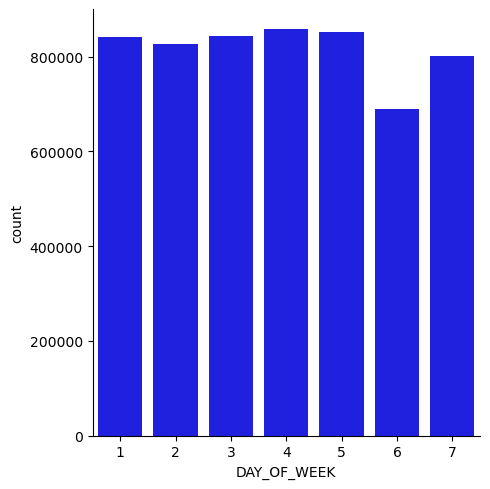

In [77]:
sns.catplot(x='DAY_OF_WEEK', kind='count', data=cleaned_flights, color="blue")
plt.show()

Lets note that the distribution of the flights is almost uniformally distributed over the days of the week with slightly less flights on the beginning of the weekend (saturday).

In [79]:
cleaned_flights['ORIGIN_AIRPORT'].nunique(), cleaned_flights['DESTINATION_AIRPORT'].nunique()

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 81, Finished, Available, Finished)

(929, 929)

We have a big number of airports. Therefore, plotting the number of flights originated from or destinated will not be easy to interpret. Therefore, I propose to present the Top 10 and the Least Common 10 Origin Airports and the Top 10 and Least Common 10 Destinations.

In [80]:
origin_air_flights = cleaned_flights.groupby('ORIGIN_AIRPORT', as_index=False)['FLIGHT_NUMBER'].count()
origin_air_flights.sort_values(by='FLIGHT_NUMBER',inplace=True, ignore_index=True)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 82, Finished, Available, Finished)

In [81]:
origin_air_flights.head(10)

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 83, Finished, Available, Finished)

,ORIGIN_AIRPORT,FLIGHT_NUMBER
0,12265,1
1,11097,1
2,11503,1
3,13459,1
4,13502,1
5,14025,1
6,15497,1
7,14222,1
8,11905,1
9,10333,2


In [26]:
# Extracting statistical parameters from a groupby object:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

# Dataframe creation with statitical infos on each airline:
global_stats = df_flights['DEPARTURE_DELAY'].groupby(df_flights['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 28, Finished, Available, Finished)

,min,max,count,mean
AIRLINE,,,,
VX,-24.0,644.0,61385.0,9.022595
HA,-27.0,1433.0,76119.0,0.485713
F9,-46.0,1112.0,90290.0,13.350858
NK,-37.0,836.0,115454.0,15.944766
AS,-82.0,963.0,171910.0,1.785801
US,-35.0,759.0,194825.0,6.141137
B6,-31.0,1006.0,262843.0,11.514353
MQ,-36.0,1544.0,280282.0,10.125188
UA,-40.0,1314.0,509534.0,14.435441


In [27]:
# Create a deep copy
temp = df_flights.copy()
# Set departure delay values of early departed flights to zero
temp.loc[temp.loc[:, 'DEPARTURE_DELAY'] < np.timedelta64(0,'m'), 'DEPARTURE_DELAY'] = np.timedelta64(0,'m')


StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 29, Finished, Available, Finished)

TypeError: The DType <class 'numpy.dtype[float64]'> could not be promoted by <class 'numpy.dtype[timedelta64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[timedelta64]'>)

Grouping by delays

In [ ]:
# Grouping the delays
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
data['DelayLvl'] = data['DepDelay'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="UniqueCarrier", hue='DelayLvl', data=data)

# Setting Labels
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

# Setting Legends
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

## Busiest Airlines and Airports

In [15]:

fig = plt.figure(figsize=(12,4), constrained_layout=True, dpi=80)
# Set font size
sns.set(font_scale=1)

# Arrange grid size of subplot
grid = plt.GridSpec(1, 2, hspace=0.1, wspace=0.1, figure=fig)
ax1 = plt.subplot(grid[0])
ax2 = plt.subplot(grid[1])

# Merge two dataframe for busiest airlines
cleaned_flights = pd.merge(temp.IATA.value_counts(), airlines, left_index=True, right_on='Code').sort_values('IATA')
colors= sns.color_palette('YlOrRd', 18)

ax1.barh(temp_df.CarrierName, temp_df.IATA, color=colors, edgecolor='k')

# Axis arrangements
ax1.set_xticks([x * 1e6 for x in [0, 0.4, 0.8, 1.2]])
ax1.set_xticklabels(['0', '400k', '800k', '1.2m'])
ax1.set_title('Number of Flights per Airline')

# Reset color cycle
plt.gca().set_prop_cycle(None)
colors = sns.color_palette('YlOrRd', 20)
# Merge two dataframe for busiest airports
temp_df = pd.merge(temp.OrgAirID.value_counts().head(20), airport, left_index=True, right_on='AirID').sort_values('OrgAirID')
# Top Airports
ax2.barh(temp_df.Name.str.rsplit(' ',1).str[0], temp_df.OrgAirID, color=colors, edgecolor='k')
# Axis arrangements
ax2.set_xticks([x * 1e5 for x in [0, 1, 2, 3, 4]])
ax2.set_xticklabels(['0', '100k', '200k', '300k', '400k'])
_ = ax2.set_title('Number of Flights per Airports (Top 20)') # Disable ouput

# Delete temporary variables
del grid, ax1, ax2, temp_df, colors

StatementMeta(, 1538818a-b558-48c8-b2e9-50ffa1a94ed2, 17, Finished, Available, Finished)

NameError: name 'sns' is not defined